In [1]:
%load_ext autoreload
%autoreload 2
from exon_evolution import *

In [2]:
db_filename = '/home/msarrias/dbs/homo_1.db'
db = gffutils.FeatureDB(db_filename, keep_order=True)

### We will investigate the question of whether tools can detect exon duplications

We will evaluate:

* [exonerate](https://www.ebi.ac.uk/about/vertebrate-genomics/software/exonerate-manual)
* [spaln2](https://github.com/ogotoh/spaln)
* [miniprot](https://github.com/lh3/miniprot)



## Exonerate

##### I. We align the proteins on the chromosome sequence without mutations

In [3]:
# !exonerate genes_with_dup_original_prot_seq_.fa /home/msarrias/data/Homo_sapiens.GRCh38.dna.chromosome.1.fa --model protein2genome --showtargetgff True > ../../02-seq-align-tools/Exonerate/exon_showgff_protein2genome.out.txt 


In [4]:
with open('../../01-pkl-files/simulated_genes_breakdown_dict.pkl', 'rb') as handle:
    simulated_genes_breakdown_dict_before = pickle.load(handle)
with open('../../01-pkl-files/protein_gene_corresp.pkl', 'rb') as handle:
    protein_gene_dict = pickle.load(handle)
with open('../../01-pkl-files/GRCh38_duplicated_coding_exons_coords.pkl', 'rb') as handle:
    dups_GRCh38_gene_coords = pickle.load(handle)

In [5]:
genes_with_duplications = list(protein_gene_dict.values())
genes_location = {gene_id: P.open(db[gene_id].start,db[gene_id].end) for gene_id in genes_with_duplications}

In [6]:
#parse exonerate output
ex_out_fname = '../../02-seq-align-tools/Exonerate/exon_showgff_protein2genome.out.txt'
ex_format = 'exonerate-text'

all_qresult = list(SearchIO.parse(ex_out_fname, ex_format))
hits_feature_intervals = parse_exonerate_output(all_qresult)
overlaping_queries = get_overlaping_queries(protein_gene_dict, genes_location, hits_feature_intervals)

### We will now work with a chromosome containing coding exons duplications

In [7]:
fasta_GRCh38_seq = SeqIO.parse(open('/home/msarrias/data/Homo_sapiens.GRCh38.dna.chromosome.1.fa'),'fasta')
fasta_GRCh38_seq = { fasta.id : {'+' : str(fasta.seq),
                                 '-': str(fasta.seq.reverse_complement())} for fasta in fasta_GRCh38_seq}

fasta_GRCh38_seq_with_dup = SeqIO.parse(open('../../00-fasta-files/GRCh38_with_coding_exon_dup_with_is.fa'),'fasta')
fasta_GRCh38_seq_with_dup = { fasta.id : str(fasta.seq) for fasta in fasta_GRCh38_seq_with_dup}


##### II.  Duplications of the second coding exon inserted before the real coding exon

In [8]:
# !exonerate genes_with_dup_original_prot_seq_.fa GRCh38_with_coding_exon_dup_with_is.fa --model protein2genome --showtargetgff True > ../../02-seq-align-tools/Exonerate/exon_showgff_protein2genome_ce_dup_with_is.out.txt 


In [9]:
with open('../../01-pkl-files/simulated_genes_breakdown_dict_with_is.pkl', 'rb') as handle:
    simulated_genes_breakdown_dict_before = pickle.load(handle)
with open('../../01-pkl-files/protein_gene_corresp.pkl', 'rb') as handle:
    protein_gene_dict = pickle.load(handle)
with open('../../01-pkl-files/GRCh38_duplicated_coding_exons_coords_with_is.pkl', 'rb') as handle:
    dups_GRCh38_gene_coords = pickle.load(handle)

In [10]:
dups_genes_loc_with_is  = {gene_id: P.open(value['seq'][0][0], value['seq'][0][1]) 
                          for gene_id, value in dups_GRCh38_gene_coords.items()}

In [11]:
#parse exonerate output

ex_out_fname = '../../02-seq-align-tools/Exonerate/exon_showgff_protein2genome_ce_dup_with_is.out.txt'
ex_format = 'exonerate-text'
all_qresult = list(SearchIO.parse(ex_out_fname, ex_format))

hits_feature_intervals = parse_exonerate_output(all_qresult)

overlaping_queries_before = get_overlaping_queries(protein_gene_dict, dups_genes_loc_with_is,  hits_feature_intervals)

sorted_overlaping_queries_before = {i : copy.deepcopy(overlaping_queries_before[i]) 
                                    for i in overlaping_queries.keys()} 


extra hits:
ENSP00000360315
{'hit': [(54988035,54988401)], 'query': [(2,124)]}


##### III.  Duplications of the second coding exon inserted after the real coding exon

In [12]:
# !exonerate genes_with_dup_original_prot_seq_after.fa GRCh38_with_coding_exon_dup_with_is_after.fa --model protein2genome --showtargetgff True > ../../02-seq-align-tools/Exonerate/exon_showgff_protein2genome_ce_dup_with_is_after.out.txt 

In [13]:
with open('../../01-pkl-files/GRCh38_duplicated_coding_exons_coords_with_is_after.pkl', 'rb') as handle:
    dups_GRCh38_gene_coords_after = pickle.load(handle)

with open('../../01-pkl-files/simulated_genes_breakdown_dict_with_is_after.pkl', 'rb') as handle:
    simulated_genes_breakdown_dict_after = pickle.load(handle)    

In [14]:
fasta_GRCh38_seq_with_dup_after = SeqIO.parse(open('../../00-fasta-files/GRCh38_with_coding_exon_dup_with_is_after.fa'),'fasta')
fasta_GRCh38_seq_with_dup_after = { fasta.id : str(fasta.seq) for fasta in fasta_GRCh38_seq_with_dup_after}

In [15]:
dups_genes_loc_after  = {gene_id: P.open(value['seq'][0][0], value['seq'][0][1]) 
                         for gene_id, value in dups_GRCh38_gene_coords_after.items()}


In [16]:
#parse exonerate output
ex_out_fname = '../../02-seq-align-tools/Exonerate/exon_showgff_protein2genome_ce_dup_with_is_after.out.txt'
all_qresult = list(SearchIO.parse(ex_out_fname, ex_format))

In [17]:
hits_feature_intervals_2nd_ced_after = parse_exonerate_output(all_qresult)
overlaping_queries_after = get_overlaping_queries(protein_gene_dict, dups_genes_loc_after, 
                                                  hits_feature_intervals_2nd_ced_after)

sorted_overlaping_queries_after = {i : copy.deepcopy(overlaping_queries_after[i]) 
                                   for i in overlaping_queries.keys()} 

extra hits:
ENSP00000360315
{'hit': [(54988035,54988401)], 'query': [(2,124)]}


### Exonerate alignments:

##### Will exonerate find the two possible alignments in the same region where the duplication is, or does it require the alignments to hit different parts of the genome sequence?


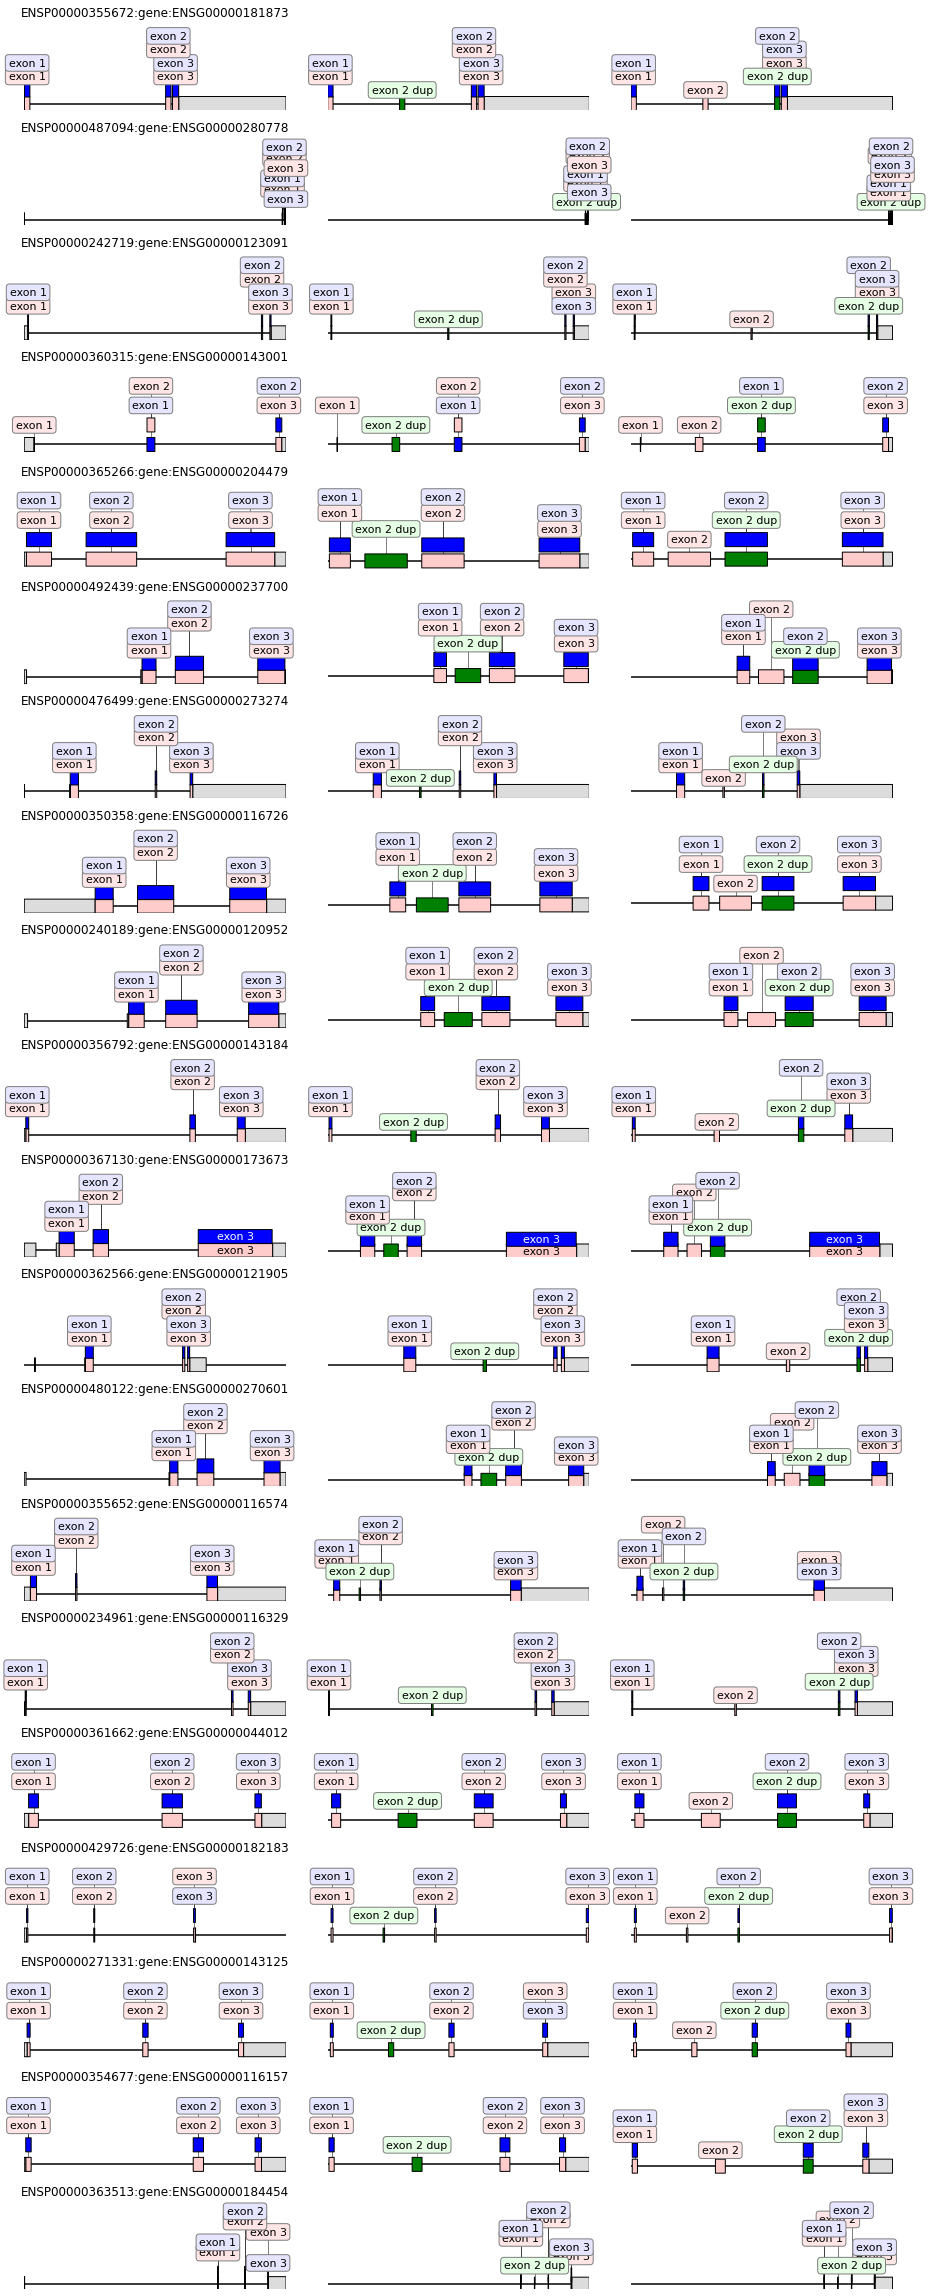

In [19]:
fig, ax = plt.subplots(len(overlaping_queries),3, figsize=(13, 32))
plt.tight_layout()
for prot_idx, (prot_id, overlaping_hit_dict) in enumerate(overlaping_queries.items()):
    gene_id = protein_gene_dict[prot_id]
    coords_gene = genes_location[gene_id]
    gs, ge = coords_gene.lower, coords_gene.upper
    features = []
    idx = 1
    record = get_record(idx, gene_id, dups_GRCh38_gene_coords, gs, ge, 
                        simulated_genes_breakdown_dict_before[gene_id],
                        overlaping_hit_dict)
    ax[prot_idx,0].set_title(prot_id + ':' + gene_id, loc='center')
    record.plot(ax=ax[prot_idx,0], figure_width=5, with_ruler=False) 
for prot_idx, (prot_id, overlaping_hit_dict) in enumerate(sorted_overlaping_queries_before.items()):
    gene_id = protein_gene_dict[prot_id]
    coords_gene = dups_genes_loc_with_is[gene_id]
    gs, ge = coords_gene.lower, coords_gene.upper
    features = []
    idx = 1
    record = get_record(idx, gene_id, dups_GRCh38_gene_coords, gs, ge, 
                        simulated_genes_breakdown_dict_before[gene_id],
                        overlaping_hit_dict, mutations=True,
                        genome_seq = fasta_GRCh38_seq['1']['+'],
                        mut_loc='before', exon_dup=2, 
                        genome_seq_with_mut=fasta_GRCh38_seq_with_dup['+'])
    record.plot(ax=ax[prot_idx,1], figure_width=5, with_ruler=False)
for prot_idx, (prot_id, overlaping_hit_dict) in enumerate(sorted_overlaping_queries_after.items()):
    gene_id = protein_gene_dict[prot_id]
    coords_gene = dups_genes_loc_after[gene_id]
    gs, ge = coords_gene.lower, coords_gene.upper
    features = []
    idx = 1
    record = get_record(idx, gene_id, dups_GRCh38_gene_coords_after, gs, ge,
                        simulated_genes_breakdown_dict_after[gene_id],
                        overlaping_hit_dict, mutations=True,
                        genome_seq = fasta_GRCh38_seq['1']['+'],
                        mut_loc='after', exon_dup=2, 
                        genome_seq_with_mut=fasta_GRCh38_seq_with_dup_after['+'])
    record.plot(ax=ax[prot_idx,2], figure_width=5, with_ruler=False)
fig.tight_layout()    
plt.savefig('../../04-figures/exonerate_alignms_with_is.jpg', bbox_inches='tight') 

## miniprot

##### I. We align the proteins on the chromosome sequence without mutations

In [20]:
# !/domus/h1/msarrias/bin/miniprot/miniprot -t8 /home/msarrias/data/Homo_sapiens.GRCh38.dna.chromosome.1.fa genes_with_dup_original_prot_seq_.fa > ../../02-seq-align-tools/Miniprot/spaln_align_no_mutations.paf

In [21]:
miniprot_hits_no_mutation = parse_miniprot_output('../../02-seq-align-tools/Miniprot/spaln_align_no_mutations.paf', 
                                                  genes_location,
                                                  protein_gene_dict)
overlaping_queries_no_mut = get_CIGAR_string_overlaping_queries(miniprot_hits_no_mutation)
exon_intv_no_mut = get_matching_intervals(overlaping_queries_no_mut)

miniprot_sorted_overlaping_queries_no_mut = {i : copy.deepcopy(exon_intv_no_mut[i][0]) 
                                              for i in overlaping_queries.keys()} 

### We will now work with a chromosome containing coding exons duplications

##### II.  Duplications of the second coding exon inserted before the real coding exon

In [22]:
# !/domus/h1/msarrias/bin/miniprot/miniprot -t8 GRCh38_with_coding_exon_dup_with_is.fa genes_with_dup_original_prot_seq_.fa > ../../02-seq-align-tools/Miniprot/miniprot_align_mut_before.paf

In [23]:
miniprot_hits_mut_before = parse_miniprot_output('../../02-seq-align-tools/Miniprot/miniprot_align_mut_before.paf',
                                                 dups_genes_loc_with_is,
                                                 protein_gene_dict)
overlaping_queries_mut_before = get_CIGAR_string_overlaping_queries(miniprot_hits_mut_before)
exon_intv_mut_before = get_matching_intervals(overlaping_queries_mut_before)

miniprot_sorted_overlaping_queries_mut_before = {i : copy.deepcopy(exon_intv_mut_before[i][0]) 
                                                 for i in overlaping_queries.keys()} 

##### III.  Duplications of the second coding exon inserted after the real coding exon

In [24]:
# !/domus/h1/msarrias/bin/miniprot/miniprot -t8 GRCh38_with_coding_exon_dup_with_is_after.fa genes_with_dup_original_prot_seq_after.fa > ../../02-seq-align-tools/Miniprot/miniprot_align_mut_after.paf

In [25]:
miniprot_hits_mut_after = parse_miniprot_output('../../02-seq-align-tools/Miniprot/miniprot_align_mut_after.paf',
                                                dups_genes_loc_after,
                                                protein_gene_dict)
overlaping_queries_mut_after = get_CIGAR_string_overlaping_queries(miniprot_hits_mut_after)
exon_intv_mut_after = get_matching_intervals(overlaping_queries_mut_after)

miniprot_sorted_overlaping_queries_mut_after = {i : copy.deepcopy(exon_intv_mut_after[i][0]) 
                                                for i in overlaping_queries.keys()} 

### 2. miniprot alignments:

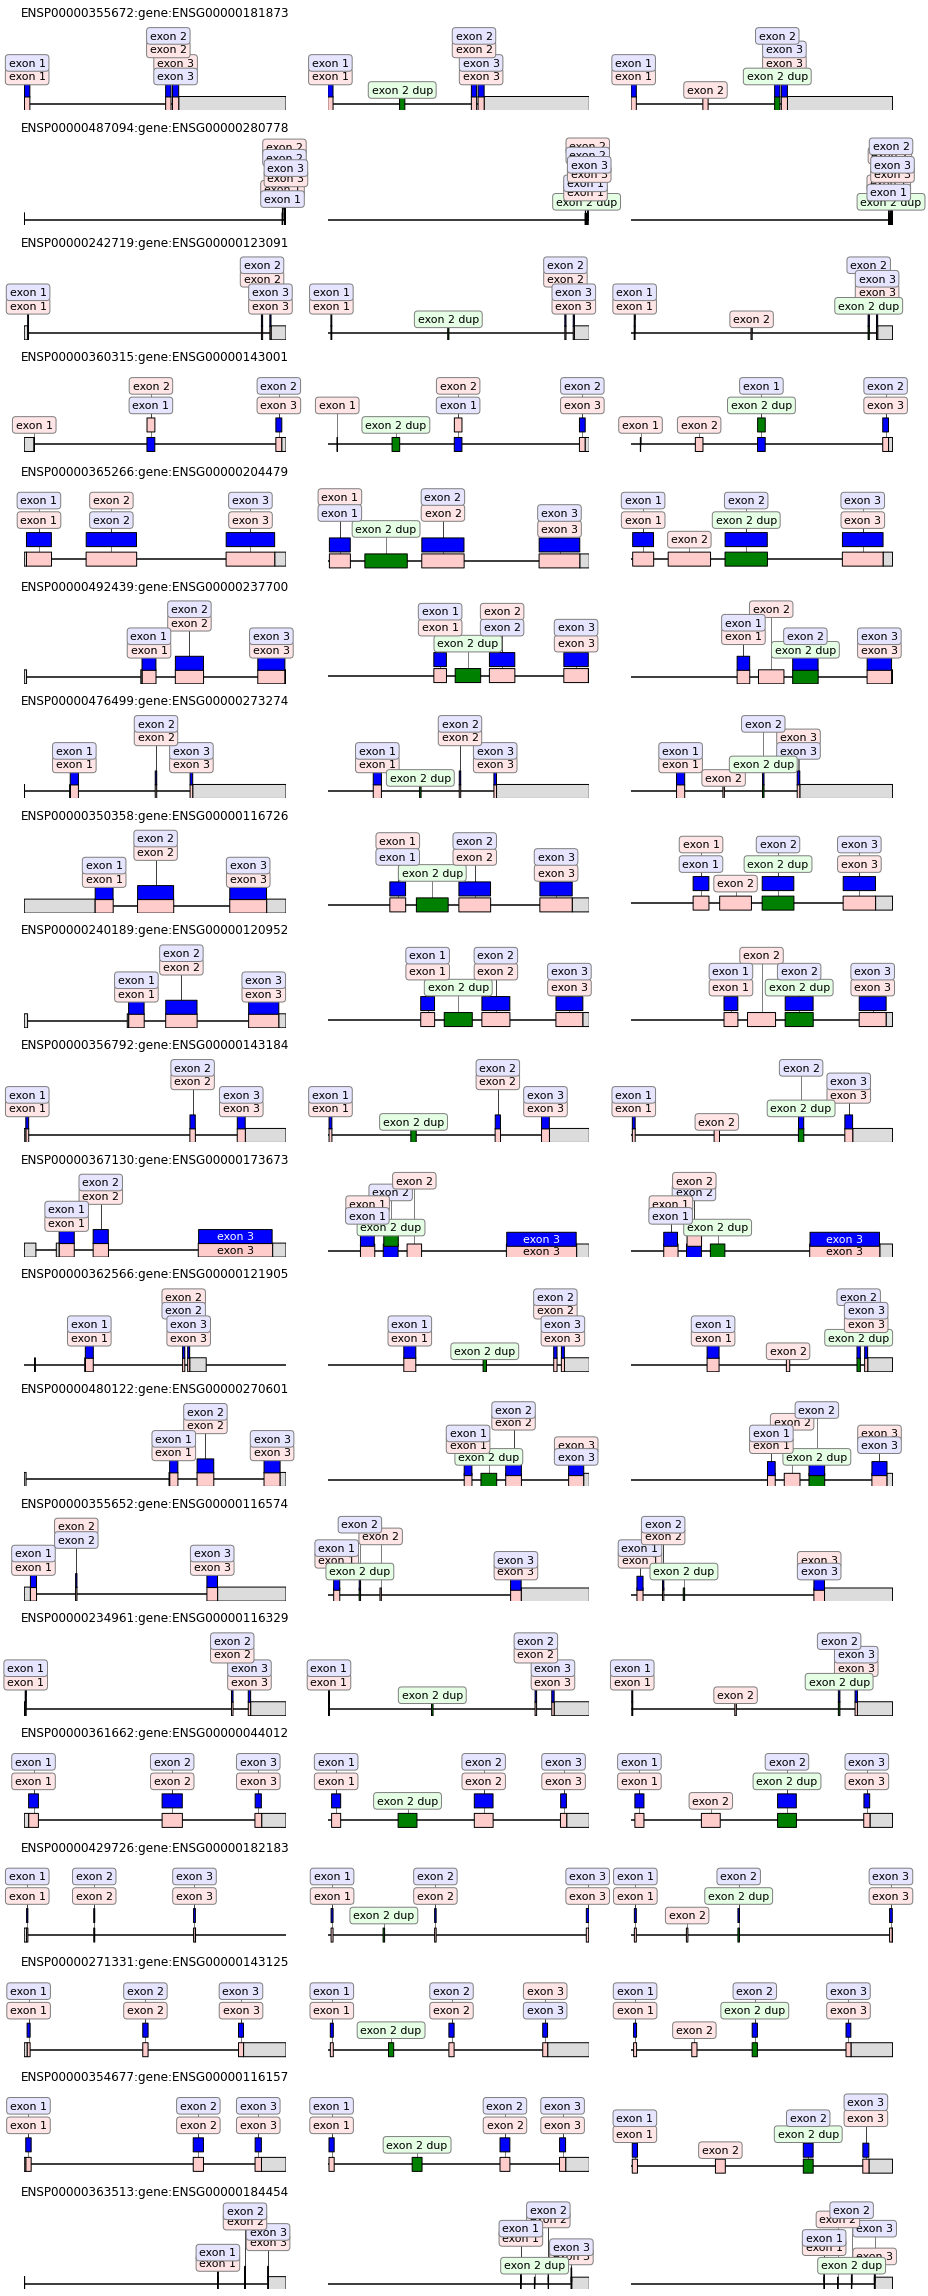

In [26]:
fig, ax = plt.subplots(len(exon_intv_no_mut),3, figsize=(13, 32))
plt.tight_layout()
for prot_idx, (prot_id, overlaping_hit_dict) in enumerate(miniprot_sorted_overlaping_queries_no_mut.items()):
    gene_id = protein_gene_dict[prot_id]
    coords_gene = genes_location[gene_id]
    gs, ge = coords_gene.lower, coords_gene.upper
    features = []
    idx = 1
    record = get_record(idx, gene_id, dups_GRCh38_gene_coords, gs, ge, 
                        simulated_genes_breakdown_dict_before[gene_id],
                        overlaping_hit_dict)
    ax[prot_idx,0].set_title(prot_id + ':' + gene_id, loc='center')
    record.plot(ax=ax[prot_idx,0], figure_width=5, with_ruler=False) 
for prot_idx, (prot_id, overlaping_hit_dict) in enumerate(miniprot_sorted_overlaping_queries_mut_before.items()):
    gene_id = protein_gene_dict[prot_id]
    coords_gene = dups_genes_loc_with_is[gene_id]
    gs, ge = coords_gene.lower, coords_gene.upper
    features = []
    idx = 1
    record = get_record(idx, gene_id, dups_GRCh38_gene_coords, gs, ge, 
                        simulated_genes_breakdown_dict_before[gene_id],
                        overlaping_hit_dict, mutations=True,
                        genome_seq = fasta_GRCh38_seq['1']['+'],
                        mut_loc='before', exon_dup=2, 
                        genome_seq_with_mut=fasta_GRCh38_seq_with_dup['+'])
    record.plot(ax=ax[prot_idx,1], figure_width=5, with_ruler=False)
for prot_idx, (prot_id, overlaping_hit_dict) in enumerate(miniprot_sorted_overlaping_queries_mut_after.items()):
    gene_id = protein_gene_dict[prot_id]
    coords_gene = dups_genes_loc_after[gene_id]
    gs, ge = coords_gene.lower, coords_gene.upper
    features = []
    idx = 1
    record = get_record(idx, gene_id, dups_GRCh38_gene_coords_after, gs, ge,
                        simulated_genes_breakdown_dict_after[gene_id],
                        overlaping_hit_dict, mutations=True,
                        genome_seq = fasta_GRCh38_seq['1']['+'],
                        mut_loc='after', exon_dup=2, 
                        genome_seq_with_mut=fasta_GRCh38_seq_with_dup_after['+'])
    record.plot(ax=ax[prot_idx,2], figure_width=5, with_ruler=False)
fig.tight_layout()    
plt.savefig('../../04-figures/miniprot_alignms.jpg', bbox_inches='tight') 

### spaln

##### I. We align the proteins on the chromosome sequence without mutations

In [27]:
# !spaln -Q 3 -O0 -o ../../02-seq-align-tools/Spaln/spaln_align_no_mutations_gff3.out.txt /home/msarrias/data/Homo_sapiens.GRCh38.dna.chromosome.1.fa genes_with_dup_original_prot_seq_.fa 
#create_database('../../02-seq-align-tools/Spaln/spaln_align_no_mutations_gff3.out.txt', '../../02-seq-align-tools/Spaln/spaln_align_no_mutations_gff3.db')

In [28]:
db_no_mut = gffutils.FeatureDB('../../02-seq-align-tools/Spaln/spaln_align_no_mutations_gff3.db', keep_order=True)
splan_hits_no_mut = parse_splan_output(db_no_mut, genes_location, protein_gene_dict)
splan_sorted_overlaping_queries_no_mut = {i : copy.deepcopy(splan_hits_no_mut[i][0]) 
                                          for i in overlaping_queries.keys() 
                                          if splan_hits_no_mut[i][0]['overlaps'] == True} 


### We will now work with a chromosome containing coding exons duplications

##### II.  Duplications of the second coding exon inserted before the real coding exon

In [29]:
# !spaln -Q 3 -O0 -o ../../02-seq-align-tools/Spaln/spaln_align_mut_before_gff3.out.txt GRCh38_with_coding_exon_dup_with_is.fa genes_with_dup_original_prot_seq_.fa 
#create_database('../../02-seq-align-tools/Spaln/spaln_align_mut_before_gff3.out.txt', '../../02-seq-align-tools/Spaln/spaln_align_mut_before_gff3.db')

In [30]:
db_mut_before = gffutils.FeatureDB('../../02-seq-align-tools/Spaln/spaln_align_mut_before_gff3.db', keep_order=True)
splan_hits_mut_before = parse_splan_output(db_mut_before, dups_genes_loc_with_is, protein_gene_dict)
splan_sorted_overlaping_queries_mut_before = {i : copy.deepcopy(splan_hits_mut_before[i][0]) 
                                               for i in overlaping_queries.keys()
                                              if splan_hits_mut_before[i][0]['overlaps'] == True
                                             } 

##### III.  Duplications of the second coding exon inserted after the real coding exon

In [31]:
# !spaln -Q 3 -O0 -o ../../02-seq-align-tools/Spaln/spaln_align_mut_after_gff3.out.txt GRCh38_with_coding_exon_dup_with_is_after.fa genes_with_dup_original_prot_seq_after.fa 
# create_database('../../02-seq-align-tools/Spaln/spaln_align_mut_after_gff3.out.txt', '../../02-seq-align-tools/Spaln/spaln_align_mut_after_gff3.db')

In [32]:
db_mut_after = gffutils.FeatureDB('../../02-seq-align-tools/Spaln/spaln_align_mut_after_gff3.db', keep_order=True)
splan_hits_mut_after = parse_splan_output(db_mut_after, dups_genes_loc_with_is, protein_gene_dict)
splan_sorted_overlaping_queries_mut_before = {i : copy.deepcopy(splan_hits_mut_after[i][0]) 
                                               for i in overlaping_queries.keys() 
                                             if splan_hits_mut_after[i][0]['overlaps'] == True} 

### 3. Spaln alignments:

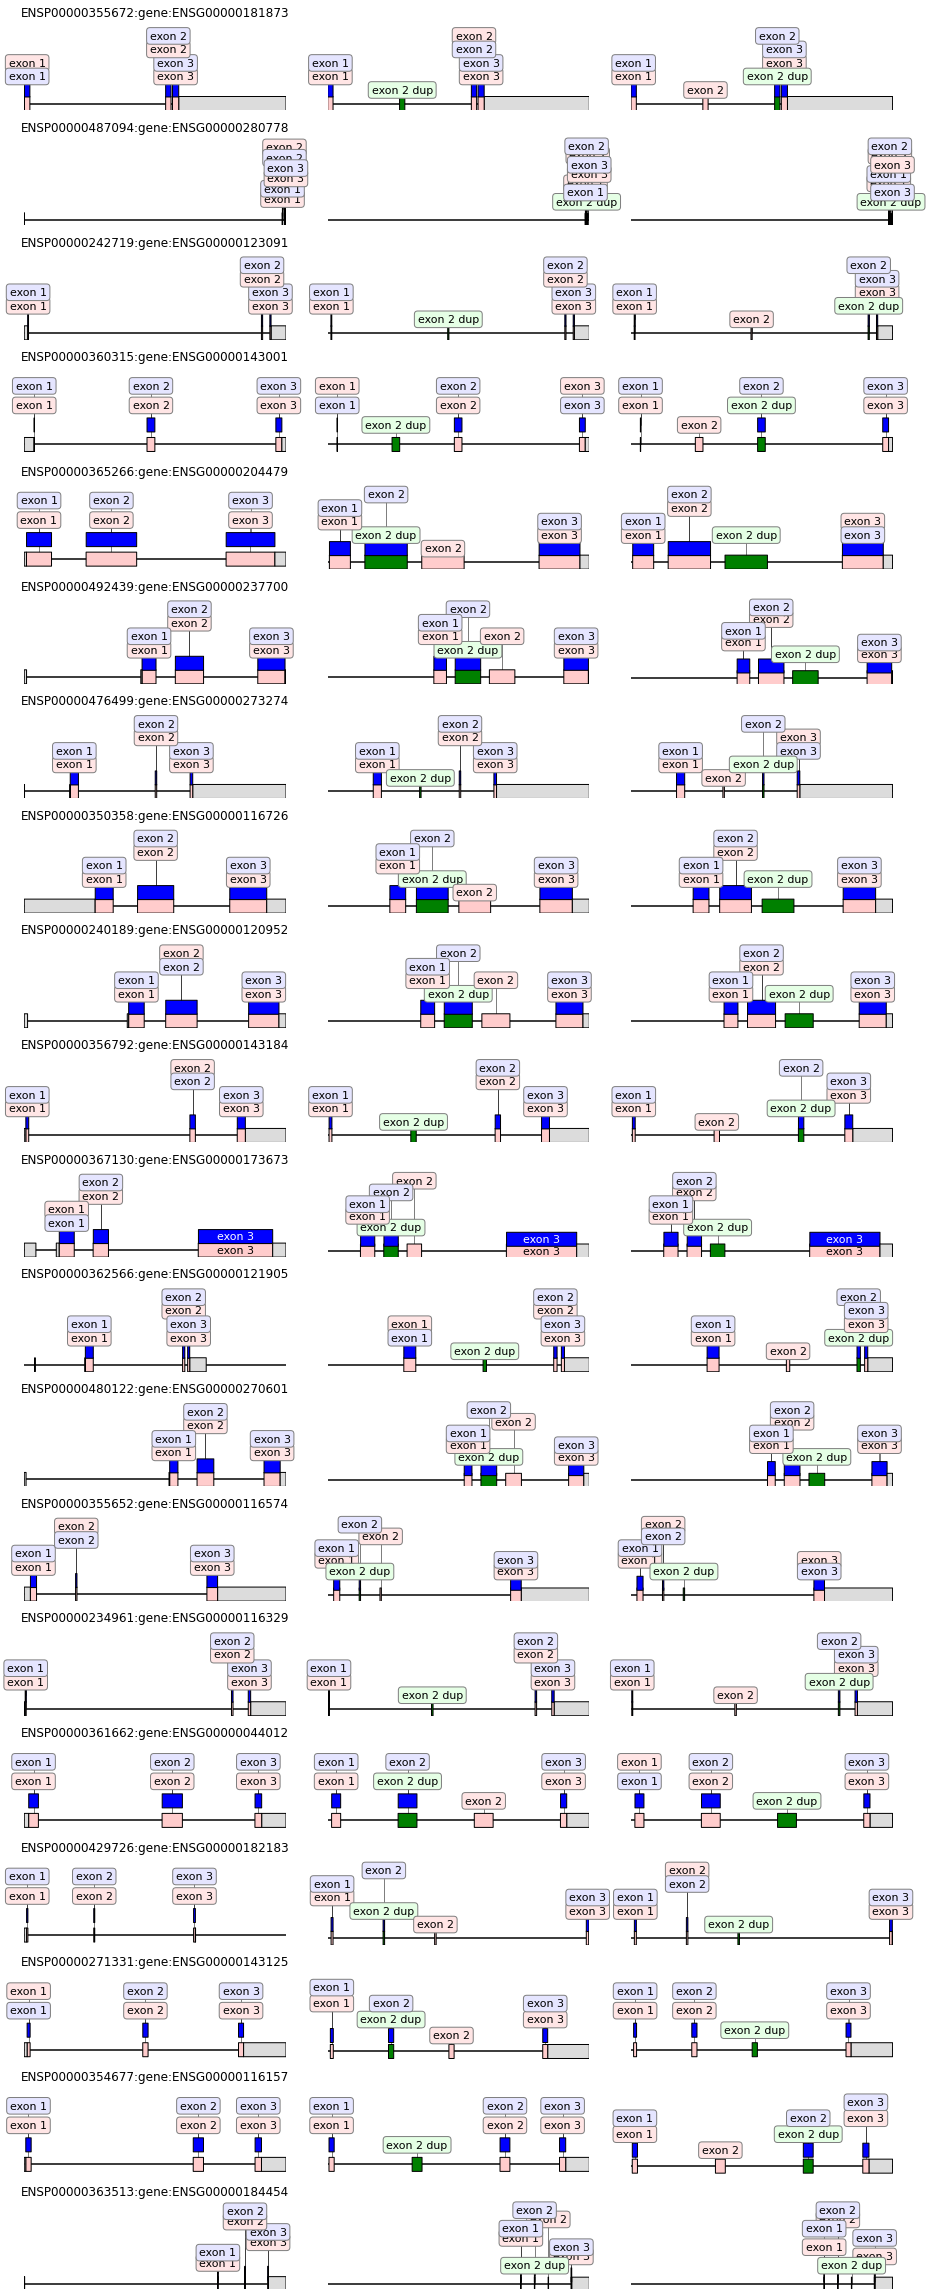

In [33]:
fig, ax = plt.subplots(len(splan_sorted_overlaping_queries_no_mut),3, figsize=(13, 32))
plt.tight_layout()
for prot_idx, (prot_id, overlaping_hit_dict) in enumerate(splan_sorted_overlaping_queries_no_mut.items()):
    gene_id = protein_gene_dict[prot_id]
    coords_gene = genes_location[gene_id]
    gs, ge = coords_gene.lower, coords_gene.upper
    features = []
    idx = 1
    record = get_record(idx, gene_id, dups_GRCh38_gene_coords, gs, ge, 
                        simulated_genes_breakdown_dict_before[gene_id],
                        overlaping_hit_dict)
    ax[prot_idx,0].set_title(prot_id + ':' + gene_id, loc='center')
    record.plot(ax=ax[prot_idx,0], figure_width=5, with_ruler=False) 
for prot_idx, (prot_id, overlaping_hit_dict) in enumerate(splan_sorted_overlaping_queries_mut_before.items()):
    gene_id = protein_gene_dict[prot_id]
    coords_gene = dups_genes_loc_with_is[gene_id]
    gs, ge = coords_gene.lower, coords_gene.upper
    features = []
    idx = 1
    record = get_record(idx, gene_id, dups_GRCh38_gene_coords, gs, ge, 
                        simulated_genes_breakdown_dict_before[gene_id],
                        overlaping_hit_dict, mutations=True,
                        genome_seq = fasta_GRCh38_seq['1']['+'],
                        mut_loc='before', exon_dup=2, 
                        genome_seq_with_mut=fasta_GRCh38_seq_with_dup['+'])
    record.plot(ax=ax[prot_idx,1], figure_width=5, with_ruler=False)
for prot_idx, (prot_id, overlaping_hit_dict) in enumerate(splan_sorted_overlaping_queries_mut_before.items()):
    gene_id = protein_gene_dict[prot_id]
    coords_gene = dups_genes_loc_after[gene_id]
    gs, ge = coords_gene.lower, coords_gene.upper
    features = []
    idx = 1
    record = get_record(idx, gene_id, dups_GRCh38_gene_coords_after, gs, ge,
                        simulated_genes_breakdown_dict_after[gene_id],
                        overlaping_hit_dict, mutations=True,
                        genome_seq = fasta_GRCh38_seq['1']['+'],
                        mut_loc='after', exon_dup=2, 
                        genome_seq_with_mut=fasta_GRCh38_seq_with_dup_after['+'])
    record.plot(ax=ax[prot_idx,2], figure_width=5, with_ruler=False)
fig.tight_layout()    
plt.savefig('../../04-figures/spaln_alignms.jpg', bbox_inches='tight') 

## Use exonerate to align a set of chicken proteins to GRCh38 chromosome 1
- For those homologies, does exonerate identifies all coding exons in ?

In [ ]:
# !exonerate fasta_files/uniprot_gallus_gallus_prot_part2.fa /home/msarrias/data/Homo_sapiens.GRCh38.dna.chromosome.1.fa --model protein2genome --showtargetgff True > Exonerate/exon_showgff_protein2genome_gallus_gallus_p3.out.txt 
